Step 0. Unzip enron1.zip into the current directory.

Step 1. Traverse the dataset and create a Pandas dataframe. This is already done for you and should run without any errors. You should recognize Pandas from task 1.

In [14]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------------

In [2]:
import pandas as pd
import os

def read_spam():
    category = 'spam'
    directory = './enron1/spam'
    return read_category(category, directory)

def read_ham():
    category = 'ham'
    directory = './enron1/ham'
    return read_category(category, directory)

def read_category(category, directory):
    emails = []
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(directory, filename), 'r') as fp:
            try:
                content = fp.read()
                emails.append({'name': filename, 'content': content, 'category': category})
            except:
                print(f'skipped {filename}')
    return emails

ham = read_ham()
spam = read_spam()

df = pd.DataFrame.from_records(ham)
df = pd.concat([df , pd.DataFrame.from_records(spam)])
# df = df.concat(pd.DataFrame.from_records(spam))
# df = df.append(pd.DataFrame.from_records(spam))
df

skipped 2248.2004-09-23.GP.spam.txt
skipped 2526.2004-10-17.GP.spam.txt
skipped 2698.2004-10-31.GP.spam.txt
skipped 4566.2005-05-24.GP.spam.txt


,name,content,category
0,0001.1999-12-10.farmer.ham.txt,Subject: christmas tree farm pictures\n,ham
1,0002.1999-12-13.farmer.ham.txt,"Subject: vastar resources , inc .\ngary , prod...",ham
2,0003.1999-12-14.farmer.ham.txt,Subject: calpine daily gas nomination\n- calpi...,ham
3,0004.1999-12-14.farmer.ham.txt,Subject: re : issue\nfyi - see note below - al...,ham
4,0005.1999-12-14.farmer.ham.txt,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham
...,...,...,...
1491,5163.2005-09-06.GP.spam.txt,Subject: our pro - forma invoice attached\ndiv...,spam
1492,5164.2005-09-06.GP.spam.txt,Subject: str _ rndlen ( 2 - 4 ) } { extra _ ti...,spam
1493,5167.2005-09-06.GP.spam.txt,Subject: check me out !\n61 bb\nhey derm\nbbbb...,spam
1494,5170.2005-09-06.GP.spam.txt,Subject: hot jobs\nglobal marketing specialtie...,spam


Step 2. Data cleaning is a critical part of machine learning. You and I can recognize that 'Hello' and 'hello' are the same word but a machine does not know this a priori. Therefore, we can 'help' the machine by conducting such normalization steps for it. Write a function `preprocessor` that takes in a string and replaces all non alphabet characters with a space and then lowercases the result.

In [3]:
import re

def preprocessor(e):
    return re.sub('[^A-Za-z]' , ' ' , e).lower()

print(preprocessor("HELLooooO"))

hellooooo


Step 3. We will now train the machine learning model. All the functions that you will need are imported for you. The instructions explain how the work and hint at which functions to use. You will likely need to refer to the scikit learn documentation to see how exactly to invoke the functions. It will be handy to keep that tab open.

Accuracy : 0.9748549323017408
[[717  12]
 [ 14 291]]


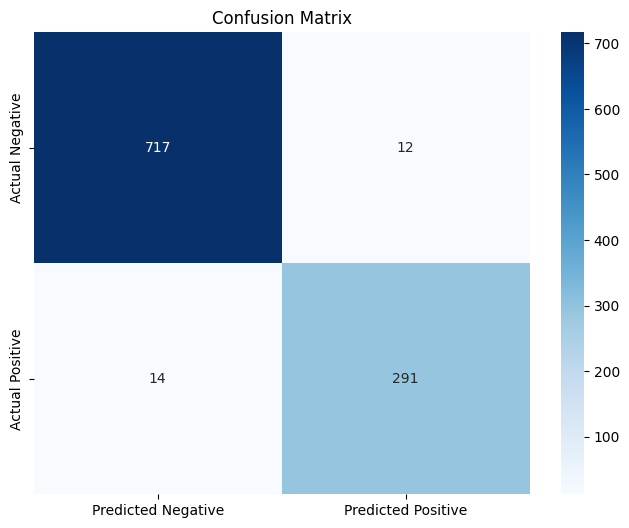

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       729
        spam       0.96      0.95      0.96       305

    accuracy                           0.97      1034
   macro avg       0.97      0.97      0.97      1034
weighted avg       0.97      0.97      0.97      1034



In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# The CountVectorizer converts a text sample into a vector (think of it as an array of floats).
# Each entry in the vector corresponds to a single word and the value is the number of times the word appeared.
# Instantiate a CountVectorizer. Make sure to include the preprocessor you previously wrote in the constructor.
vectorizer = CountVectorizer(preprocessor=preprocessor)


# Use train_test_split to split the dataset into a train dataset and a test dataset.
# The machine learning model learns from the train dataset.
# Then the trained model is tested on the test dataset to see if it actually learned anything.
# If it just memorized for example, then it would have a low accuracy on the test dataset and a high accuracy on the train dataset.
x_train,x_test,y_train,y_test = train_test_split(df['content'] , df['category'] , test_size=0.2 , random_state=42) # try random state 1 other time
#print(y_test)


# Use the vectorizer to transform the existing dataset into a form in which the model can learn from.
# Remember that simple machine learning models operate on numbers, which the CountVectorizer conveniently helped us do.
x_train_df = vectorizer.fit_transform(x_train)
x_test_df = vectorizer.transform(x_test)


# Use the LogisticRegression model to fit to the train dataset.
# You may remember y = mx + b and Linear Regression from high school. Here, we fitted a scatter plot to a line.
# Logistic Regression is another form of regression. 
# However, Logistic Regression helps us determine if a point should be in category A or B, which is a perfect fit.
classifier = LogisticRegression(random_state=1).fit(x_train_df , y_train)


# Validate that the model has learned something.
# Recall the model operates on vectors. First transform the test set using the vectorizer. 
# Then generate the predictions.
y_pred = classifier.predict(x_test_df)

accu_score = accuracy_score(y_pred=y_pred , y_true=y_test)
conf_matrix = confusion_matrix(y_true=y_test , y_pred=y_pred)
summary = classification_report(y_true=y_test , y_pred=y_pred)

print(f"Accuracy : {accu_score}")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()
# We now want to see how we have done. We will be using three functions.
# `accuracy_score` tells us how well we have done. 
# 90% means that every 9 of 10 entries from the test dataset were predicted accurately.
# The `confusion_matrix` is a 2x2 matrix that gives us more insight.
# The top left shows us how many ham emails were predicted to be ham (that's good!).
# The bottom right shows us how many spam emails were predicted to be spam (that's good!).
# The other two quadrants tell us the misclassifications.
# Finally, the `classification_report` gives us detailed statistics which you may have seen in a statistics class.
print(summary)



Step 4.

In [25]:
# Let's see which features (aka columns) the vectorizer created. 
# They should be all the words that were contained in the training dataset.
features = vectorizer.get_feature_names_out()

# You may be wondering what a machine learning model is tangibly. It is just a collection of numbers. 
# You can access these numbers known as "coefficients" from the coef_ property of the model
# We will be looking at coef_[0] which represents the importance of each feature.
# What does importance mean in this context?
# Some words are more important than others for the model.
# It's nothing personal, just that spam emails tend to contain some words more frequently.
# This indicates to the model that having that word would make a new email more likely to be spam.
coeffs = classifier.coef_[0]
coeffs

# Iterate over importance and find the top 10 positive features with the largest magnitude.
# Similarly, find the top 10 negative features with the largest magnitude.
# Positive features correspond to spam. Negative features correspond to ham.
# You will see that `http` is the strongest feature that corresponds to spam emails. 
# It makes sense. Spam emails often want you to click on a link.
l = list(enumerate(coeffs))
print()
l.sort(key=lambda e: e[1], reverse=True)
for i,imp in l[:10]:
    print(imp, features[i])
print()
l.sort(key=lambda e: -e[1], reverse=True)
for i,imp in l[:10]:
    print(imp, features[i])




0.9200891034496252 no
0.8535814508357991 http
0.8512433272326945 prices
0.7604387976064934 remove
0.7362828765686154 hello
0.7112630004127223 only
0.6774089145093063 removed
0.6636794753324802 here
0.6259464223047001 more
0.6223165120219596 paliourg

-1.493969657897885 enron
-1.4594084652093964 thanks
-1.368536273112554 attached
-1.32597431048994 doc
-1.2954903084883873 daren
-1.2922090371729922 pictures
-1.227058353271362 xls
-1.1549721235567358 deal
-1.1528223572050937 neon
-1.0434609874876564 hpl


Submission
1. Upload the jupyter notebook to Forage.

All Done!